# **Email spam Detection**
Email spam detection system is used to detect email spam using Machine Learning technique called Natural Language Processing and Python,
where we have a dataset contain a lot of emails by extract important words and then use naive classifier we can detect if this email is spam or not.

### **Libraries**

In [7]:
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style("white")
import matplotlib.pyplot as plt
import string
from pickle import dump
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import nltk
from nltk.corpus import stopwords
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Garvit
[nltk_data]     Jakar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### **Project Pipeline**
For any machine learning project it consist of three main phases as following :-
1. **Scoping :** List the problem description and project goals
2. **The Data :** Load, analyse and prepare the dataset for training
3. **The Model :** Create and train the model on the dataset

## **1 | Scoping**
The project problem is that we have a dataset containing a set of emails and we will use machine learning and nlp techniques in order to determine if this email is spam or not.

## **2 | The Data**
In this phase we will analyze and prepare the dataset before training by applying varoius steps as following :-
1. Data Loading
2. Data Visualization
3. Data Cleaning
4. Data Splitting

##### **1. Data Loading**
Load the dataset and show its info and statistics

In [8]:
# Load the dataset
dataset = pd.read_csv('messages.csv')
dataset.shape

(2893, 3)

In [9]:
# Show dataset head (first 5 records)
dataset.head() 

,subject,message,label
0,job posting - apple-iss research center,content - length : 3386 apple-iss research cen...,0
1,NaN,"lang classification grimes , joseph e . and ba...",0
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas ( ...,0
3,risk,a colleague and i are researching the differin...,0
4,request book information,earlier this morning i was on the phone with a...,0


In [10]:
# Show dataset info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2893 entries, 0 to 2892
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   subject  2831 non-null   object
 1   message  2893 non-null   object
 2   label    2893 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 67.9+ KB


In [11]:
# Show dataset statistics
dataset.describe()

,label
count,2893.000000
mean,0.166263
std,0.372381
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


##### **2. Data Visualization**
Visualize dataset features frequencies to get some insights

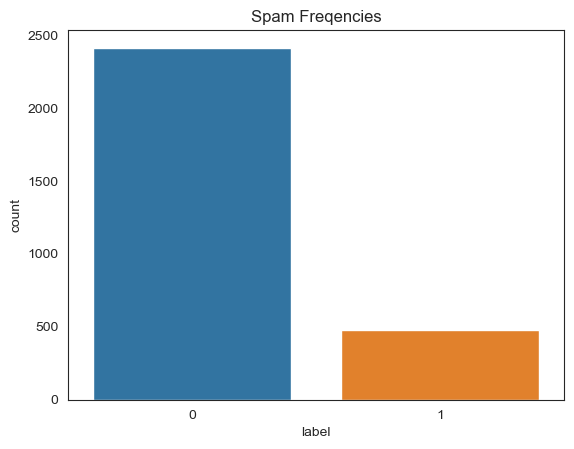

In [13]:
# Visualize spam  frequenices
plt.figure(dpi=100)
sns.countplot(dataset['label'])
plt.title("Spam Freqencies")
plt.show()

##### **3. Data Cleaning**
Handling missing values and check for duplicates 

In [14]:
# Check for missing data for each column 
dataset.isnull().sum()

subject    62
message     0
label       0
dtype: int64

In [15]:
# Check for duplicates and remove them 
dataset.drop_duplicates(inplace=True)

In [16]:
# Cleaning data from punctuation and stopwords and then tokenizing it into words (tokens)
def process(text):
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    clean = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    return clean

In [ ]:
# Fit the CountVectorizer to data
message = CountVectorizer(analyzer=process).fit_transform(dataset['message'])

In [ ]:
# Save the vectorizer
dump(message, open("models/vectorizer.pkl", "wb"))

##### **4. Data Splitting**
Split the dataset into training and testing sets

In [12]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(message, dataset['spam'], test_size=0.20, random_state=0)

## **3. The Model**
In this phase we will create and train a multinomial naive bayes model 

In [13]:
# Model creation
model = MultinomialNB()

In [14]:
# Model training
model.fit(X_train, y_train)

MultinomialNB()

In [15]:
# Model saving
dump(model, open("models/model.pkl", 'wb'))

In [16]:
# Model predictions on test set
y_pred = model.predict(X_test)

In [17]:
# Model Evaluation | Accuracy
accuracy = accuracy_score(y_test, y_pred)
accuracy * 100

99.20983318700614

In [18]:
# Model Evaluation | Classification report
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       1.00      0.99      0.99       870\n           1       0.97      1.00      0.98       269\n\n    accuracy                           0.99      1139\n   macro avg       0.98      0.99      0.99      1139\nweighted avg       0.99      0.99      0.99      1139\n'

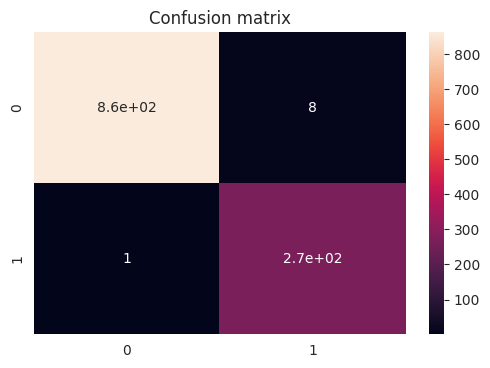

In [19]:
# Model Evaluation | Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(dpi=100)
sns.heatmap(cm, annot=True)
plt.title("Confusion matrix")
plt.show()